# **Rasterio**
Rasterio is a Python library designed to handle geospatial raster datasets. It provides a powerful and efficient way to read, write, manipulate, and analyze raster data. Rasterio builds upon the capabilities of the GDAL (Geospatial Data Abstraction Library) and provides a more user-friendly and Pythonic interface.

Here are some key features and functionalities of Rasterio:

* **Reading and Writing Raster Data:** Rasterio supports reading and writing various raster formats, including GeoTIFF, JPEG, PNG, and more. It provides an easy way to access the metadata, spatial reference system (SRS), and other properties of the raster dataset.

* **Data Manipulation:** Rasterio allows you to perform various operations on raster data, such as cropping, reprojecting, resampling, warping, and merging. It provides efficient memory-mapped access to the raster data, enabling processing of large datasets.

* **Georeferencing and Coordinate Transformation:** Rasterio handles the transformation between pixel coordinates and real-world geographic coordinates using the affine transformation matrix. It provides functionality to convert between different coordinate reference systems (CRS) and perform spatial transformations.

* **Masking and Clipping:** Rasterio provides tools to mask out specific areas of a raster using boolean masks or geometries. It allows you to clip rasters using bounding boxes, polygons, or other shapes.

* **Dataset Metadata and Attributes:** Rasterio allows you to access and modify the metadata and attributes associated with raster datasets, including band information, nodata values, and color mapping.

* **Parallel Processing:** Rasterio supports parallel processing of raster data using Python's multiprocessing module, allowing efficient utilization of multi-core systems for raster operations.

* **Integration with Geospatial Libraries:** Rasterio seamlessly integrates with other geospatial libraries such as NumPy, Matplotlib, GeoPandas, and Shapely, enabling powerful geospatial analysis workflows.

Overall, Rasterio provides a convenient and efficient way to work with raster data in Python, making it a valuable tool for geospatial analysis, remote sensing, GIS (Geographic Information System) applications, and other fields that deal with geospatial datasets.

## **01. Importing Required Libraries**

In [1]:
import os
import rasterio
from rasterio.plot import show
import numpy as np
import geopandas as gpd
import shapely.geometry
import matplotlib.pyplot as plt

## **02. Setting Up the Current Working Directory**

In [2]:
# Checking the current working directory
os.getcwd()

'D:\\Coding\\Git Repository\\Geospatial_Data_Science_with_Python\\02_Exploring_Geospatial_Packages'

In [3]:
# Changing the current working directory
file_path = r"D:\GIS Project\Raster Files"
os.chdir(file_path)

In [4]:
# Checking the current working directory again
os.getcwd()

'D:\\GIS Project\\Raster Files'

## **03. Reading the Raster File with Rasterio**

**Dataset Description:**<br>
The NASA Shuttle Radar Topography Mission (SRTM) 30m Digital Elevation Model (DEM) dataset provides high-resolution elevation data for the Earth's surface. This dataset is derived from radar measurements collected by the Space Shuttle Endeavour during a 2000 mission.

For a specific area, the SRTM 30m DEM dataset offers a detailed representation of the terrain, capturing elevation values at a resolution of approximately 30 meters. This level of detail allows for precise analysis and modeling of the topography, making it valuable for a range of applications, including hydrology, terrain analysis, visualization, and environmental studies.

In [5]:
# Reading raster from local file with rasterion
elev = rasterio.open(file_path + "\\Bankura_SRTM_DEM.tif", mode="r")

In [6]:
# Checking the datatype of the elev variable
type(elev)

rasterio.io.DatasetReader

## **04. Rasterio Attributes and Methods**

In [7]:
# Checking the name/path of the raster file
elev.name

'D:/GIS Project/Raster Files/Bankura_SRTM_DEM.tif'

In [8]:
# Checking the metadata of the raster file
elev.meta

{'driver': 'GTiff',
 'dtype': 'int16',
 'nodata': None,
 'width': 4286,
 'height': 3753,
 'count': 1,
 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]'),
 'transform': Affine(0.0002694945852358564, 0.0, 86.608698328262,
        0.0, -0.0002694945852358564, 23.63750399760002)}

In [9]:
# Checking the driver, crs and count separately
print("Raster Driver:", elev.driver)
print("Raster CRS:", elev.crs)
print("Raster Count:", elev.count)

Raster Driver: GTiff
Raster CRS: GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]
Raster Count: 1


**bounds Method:** <br>
bounds method is used to retrieve the bounding box or extent of a raster dataset. The bounding box represents the minimum and maximum coordinates in the x and y dimensions that encompass the entire raster.

In [10]:
# Checking the bounding box of the data
elev.bounds

BoundingBox(left=86.608698328262, bottom=22.626090819209853, right=87.76375212058288, top=23.63750399760002)

By using the asterisk (*) before elev.bounds, it unpacks the values from elev.bounds and passes them as separate arguments to the shapely.geometry.box function.

In [11]:
print(*elev.bounds)

86.608698328262 22.626090819209853 87.76375212058288 23.63750399760002


**shapely.geometry.box:** <br> This method in Shapely is used to create a rectangular polygon, also known as a bounding box. It creates a Shapely geometry object representing a rectangular region defined by its minimum and maximum x and y coordinates.

In [12]:
# Converting the bounding box into shapely geometry object
bbox = shapely.geometry.box(*elev.bounds)
# Converting the bounding box into geopandas geoseries object
bbox_geo = gpd.GeoSeries(bbox)

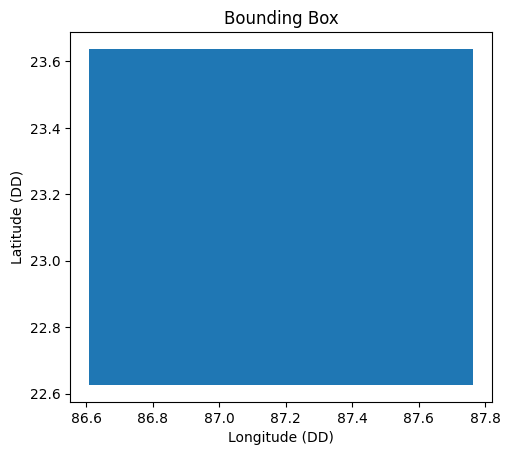

In [13]:
# Plotting the bounding box
bbox_geo.plot()
plt.title("Bounding Box")
plt.xlabel("Longitude (DD)")
plt.ylabel("Latitude (DD)")
plt.show()

## **05. Creating a Subset Area**

In [14]:
# Reading the Shapefile of the region of interest
file_path = r"D:\GIS Project\ShapeFiles\Bankura District\Bankura_District.shp"
roi = gpd.read_file(file_path)

In [15]:
# Checking the first five rows of the geodataframe
roi.head()

,id,Block,geometry
0,1,Saltora,"POLYGON ((86.90316 23.63747, 86.90551 23.63474..."
1,2,Mejia,"POLYGON ((87.03984 23.61758, 87.04093 23.61761..."
2,3,Gangajalghati,"POLYGON ((87.21625 23.49167, 87.21544 23.48895..."
3,4,Barjora,"POLYGON ((87.26154 23.51508, 87.26189 23.51486..."
4,5,Sonamukhi,"POLYGON ((87.40771 23.42870, 87.40802 23.42854..."


In [16]:
# Printing all the block names
print(roi["Block"].unique())

['Saltora' 'Mejia' 'Gangajalghati' 'Barjora' 'Sonamukhi' 'Patrasayer'
 'Indus' 'Kotulpur' 'Joypur' 'Bishnupur' 'Onda' 'Bankura I' 'Chaatna'
 'Indpur' 'Hirbandh' 'Taldangra' 'Khatra' 'Simlapal' 'Sarenga' 'Raipur'
 'Ranibandh' 'Bankura II']


In [17]:
# Extracting the Bankura I for subset area
roi_subset = roi["geometry"][roi["Block"]=="Bankura I"]

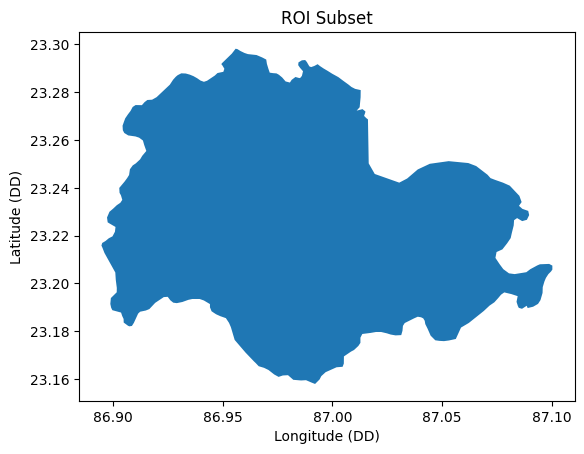

In [18]:
# Plotting the roi_subset and bounding box
roi_subset.plot()
plt.title("ROI Subset")
plt.xlabel("Longitude (DD)")
plt.ylabel("Latitude (DD)")
plt.show()

[<POLYGON ((86.99 23.159, 86.988 23.159, 86.986 23.159, 86.982 23.16, 86.98 2...>]
<class 'list'>


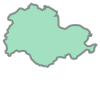

In [19]:
# Converting the Bankura I into shapely geometry
from shapely.geometry import Polygon
roi_subset_geometry = roi_subset.geometry.to_list()
print(roi_subset_geometry)
print(type(roi_subset_geometry))
# Getting the first item from the roi_subset_geometry list
roi_subset_poly = roi_subset_geometry[0]
roi_subset_poly

In [20]:
# Checking the bounds of the roi_subset_poly
minx, miny, maxx, maxy = roi_subset_poly.bounds

## **06. Visualizing Raster Data**

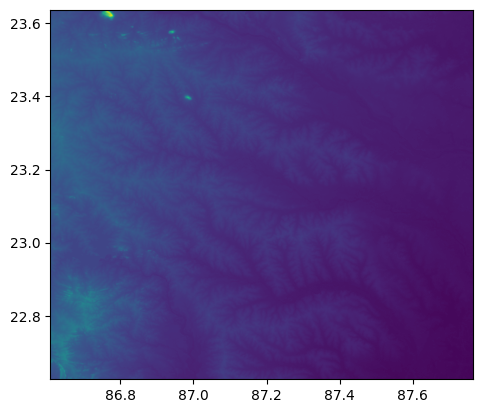

<Axes: >

In [21]:
# Visualizing the whole DEM data
show(elev)

**from_bounds:** <br> This function is used to create a raster dataset that covers a specific bounding box in the desired CRS (coordinate reference system).
**transform:**<br>In Rasterio, the .transform attribute is used to access the affine transformation matrix of a raster dataset. The transformation matrix defines the spatial relationship between the pixel coordinates of the raster and its real-world coordinates.

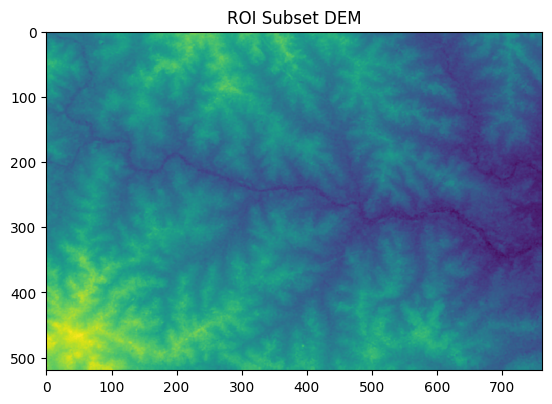

In [22]:
# Visualizing DEM data of the roi_subset area
from rasterio.windows import from_bounds
raster_path = r"D:\GIS Project\Raster Files\Bankura_SRTM_DEM.tif"
with rasterio.open(raster_path, mode="r") as src:
    dem = src.read(1, window=from_bounds(minx, miny, maxx, maxy, src.transform))
    plt.title("ROI Subset DEM")
    show(dem)

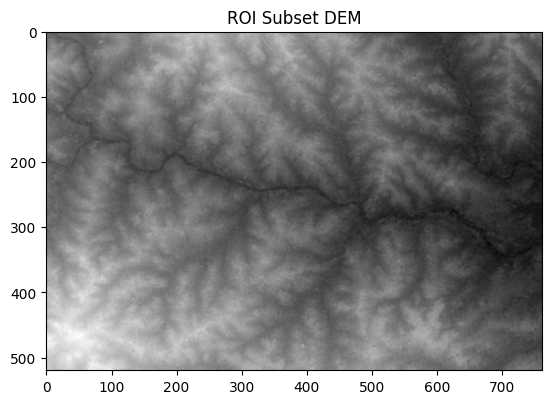

<Axes: title={'center': 'ROI Subset DEM'}>

In [23]:
# Visualizing DEM data of the roi_subset area in grayscale
plt.title("ROI Subset DEM")
show(dem, cmap="gray")